<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/experiment/%E5%84%80%E8%A1%A8%E5%81%8F%E5%B7%AE%E6%8E%A2%E7%B4%A2%E6%80%A7%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/skywalker0803r/c620.git
!pip install autorch > log.txt
!pip install optuna > log.txt

Cloning into 'c620'...
remote: Enumerating objects: 2437, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 2437 (delta 95), reused 54 (delta 25), pack-reused 2270
Receiving objects: 100% (2437/2437), 64.53 MiB | 29.94 MiB/s, done.
Resolving deltas: 100% (1588/1588), done.


# import

In [2]:
from c620.FV2 import AllSystem
import torch
from c620.configV2 import config
import joblib
import numpy as np
import pandas as pd
import os
os.chdir('/content/c620')
print(os.getcwd())
!git pull

/content/c620
Already up to date.


# data

In [3]:
demo = joblib.load('data/demo(real_data).pkl')
print(demo.keys())
icg_input = demo['icg_input']
c620_feed = demo['c620_feed']
t651_feed = demo['t651_feed']
print(icg_input.shape)
icg_input.head()

dict_keys(['icg_input', 'c620_feed', 't651_feed', 'c620_op', 'c660_op', 'c670_op', 'c620_wt', 'c660_wt', 'c670_wt'])
(168, 17)


,Simulation Case Conditions_Feed Rate_Feed from V615 Btm_m3/hr,Simulation Case Conditions_Feed Rate_Feed from V615 Btm NA_wt%,Simulation Case Conditions_Feed Rate_Feed from V615 Btm Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from V615 Btm Toluene_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist_m3/hr,Simulation Case Conditions_Feed Rate_Feed from C820 Dist NA_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist Toluene_wt%,Simulation Case Conditions_Feed Rate_Feed from T651_m3/hr,Simulation Case Conditions_Feed Rate_Feed from T651 NA_wt%,Simulation Case Conditions_Feed Rate_Feed from T651 Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from T651 Toluene_wt%,Simulation Case Conditions_Spec 1 : Benzene in C620 Sidedraw_wt%,Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw,Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr,Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw,Tatoray Stripper C620 Operation_Specifications_Spec 1 : Receiver Temp_oC
2021-02-13,182.727005,2.060,11.670,37.270,17.901134,2.370,68.700,21.000,98.045372,0.6650,43.532,42.478,87.140,838.0,0.0,29.0,40.842743
2021-02-05,179.608627,2.165,12.377,38.074,18.646059,3.088,66.645,22.216,96.942879,0.7025,43.370,42.201,85.878,800.0,0.0,16.0,40.885593
2020-12-04,166.107956,2.151,12.047,37.287,19.038383,3.474,65.729,19.557,99.873688,0.6486,43.878,42.602,86.102,805.0,0.0,35.0,39.059292
2020-11-26,169.727284,1.360,12.000,37.630,18.240871,3.000,66.560,21.430,92.989864,0.6610,43.786,41.398,86.390,749.0,0.0,19.0,41.073098
2020-11-16,176.370055,1.837,11.857,37.198,17.663765,2.622,66.132,21.395,98.291358,0.5919,44.655,42.658,92.836,738.0,0.0,32.0,43.761401


In [4]:
f = joblib.load('model/allsystem.pkl')

In [5]:
c620_wt,c620_op,c660_wt,c660_op,c670_wt,c670_op = f.inference(demo['icg_input'],demo['c620_feed'],demo['t651_feed'],real_data_mode=False)

In [6]:
c620_op_col = demo['c620_op'].dropna(axis=1).columns
f.c670_M.show_metrics(c620_op[c620_op_col],demo['c620_op'][c620_op_col])

,R2,MSE,MAPE
Density_Feed Properties,0,4.93398e-05,0.676215
Density_Vent Gas Production Rate and Composition,0,3.02118e-05,0.954037
Density_Distillate Production Rate and Composition,0,0.0041599,8.11123
Density_Sidedraw Production Rate and Composition,0,3.16898e-06,0.134163
Density_Bottoms Production Rate and Composition,0,6.75209e-06,0.2832
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0,541.791,14.9136
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,235.071,8.48573
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,157.499,6.40837
AVG,0,116.796,4.99582


In [7]:
c660_op_col = demo['c660_op'].dropna(axis=1).columns
f.c670_M.show_metrics(c660_op[c660_op_col],demo['c660_op'][c660_op_col])

,R2,MSE,MAPE
Density_Feed Properties,0,3.21904e-07,0.0446606
Density_Vent Gas Production Rate and Composition,0,0.000671065,4.04807
Density_Distillate (Benzene Drag) Production Rate and Composition,0,0.000139389,1.20888
Density_Sidedraw (Benzene )Production Rate and Composition,0,1.64029e-06,0.144911
Density_Bottoms Production Rate and Composition,0,5.32315e-08,0.0251327
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0,1932.2,21.4065
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0,1.38511,1.07435
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0,2.53836,1.31801
AVG,0,242.016,3.65882


In [8]:
c670_op_col = demo['c670_op'].dropna(axis=1).columns
f.c670_M.show_metrics(c670_op[c670_op_col],demo['c670_op'][c670_op_col])

,R2,MSE,MAPE
Density_Distillate Production Rate and Composition,0,2.49069e-08,0.0176342
Density_Bottoms Production Rate and Composition,0,1.41241e-05,0.423364
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,3436.4,17.826
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,1.55257,0.425521
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,7.86373,1.10119
AVG,0,689.163,3.95874


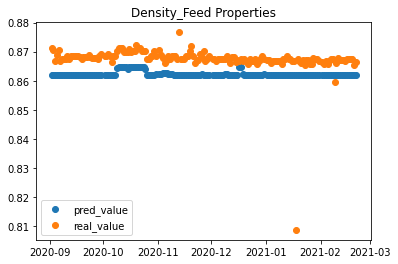

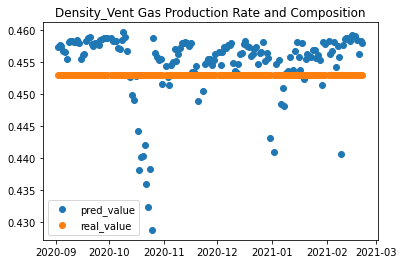

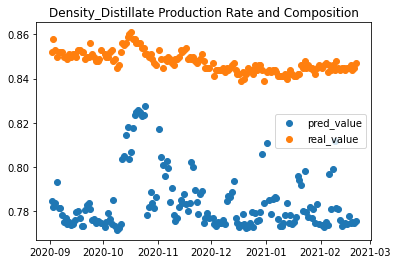

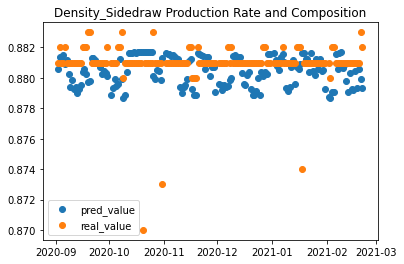

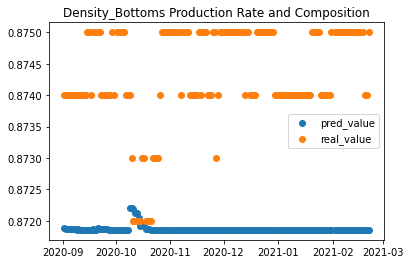

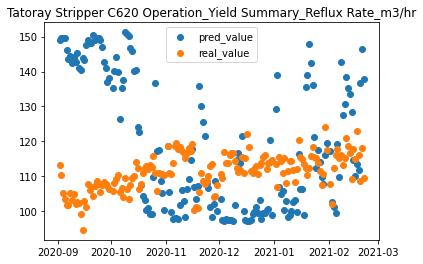

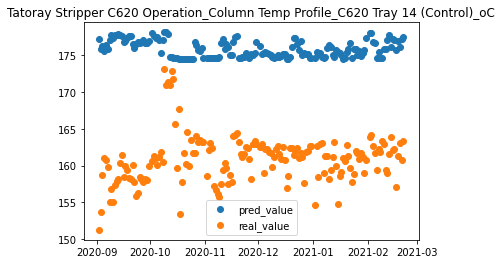

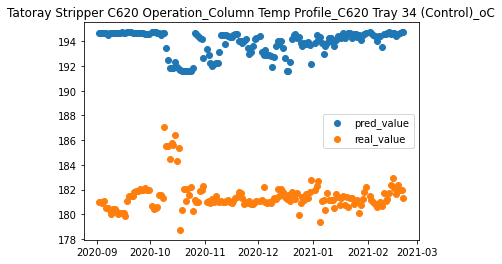

In [9]:
import matplotlib.pyplot as plt

for i in c620_op_col:
  idx = demo['icg_input'].index
  plt.scatter(idx,c620_op[i],label='pred_value')
  plt.scatter(idx,demo['c620_op'][i],label='real_value')
  plt.title(i)
  plt.legend()
  plt.show()

In [10]:
def plot_bias(name):
  table = pd.DataFrame()
  for i in c620_op.index:
    pred = c620_op.loc[[i],name].values[0]
    real = demo['c620_op'].loc[[i],name].values[0]
    bias = pred-real
    row = pd.DataFrame({'pred':pred,'real':real,'bias':bias},index=[i])
    table = table.append(row)
  bias_median = table['bias'].median()
  table['bias'].plot(kind='kde',label=f'bias:{bias_median}')
  plt.legend()
  plt.title(name)
  plt.show()

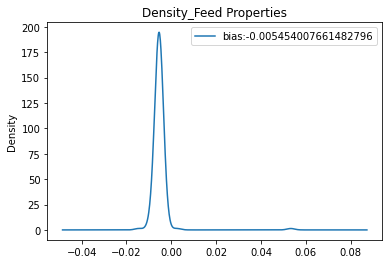

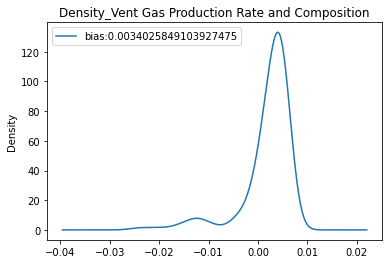

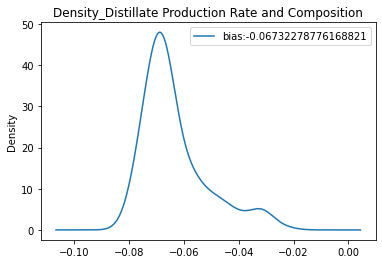

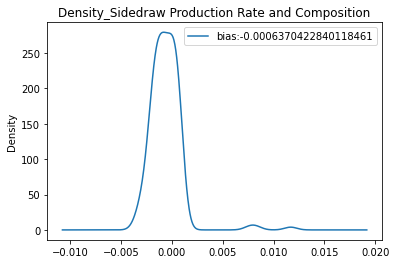

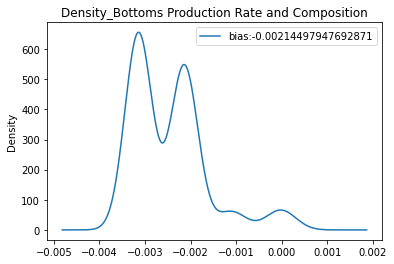

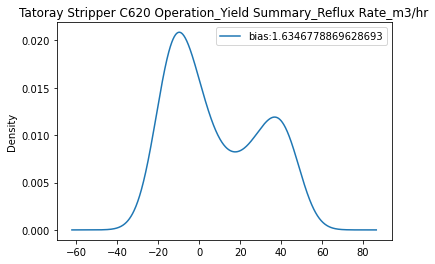

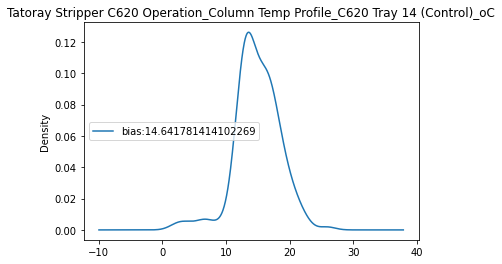

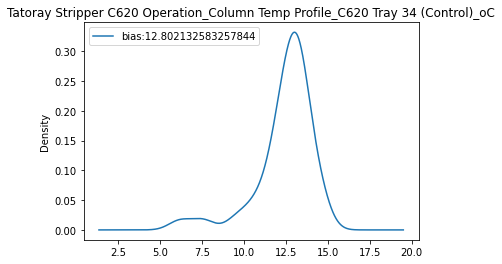

In [11]:
for name in c620_op_col:
  plot_bias(name)